# Import the libraries

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Read the dataset

In [122]:
train = pd.read_csv('Phising_Training_Dataset.csv')
test = pd.read_csv('Phising_Testing_Dataset.csv')

In [143]:
train.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


# Importing visualization libraries

In [123]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz

# Splitting the dataset for training and testing

In [124]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=10)

In [125]:
X

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,21294,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
8951,21295,-1,1,1,-1,-1,-1,1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
8952,21296,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,1,-1,1,0,1
8953,21297,-1,-1,1,1,1,-1,-1,-1,1,...,1,-1,1,1,1,1,-1,1,1,1


In [126]:
y

0      -1
1      -1
2      -1
3      -1
4       1
       ..
8950    1
8951   -1
8952   -1
8953   -1
8954   -1
Name: Result, Length: 8955, dtype: int64

# Fitting the model

In [127]:
d_model = DecisionTreeClassifier()
d_model.fit(x_train, y_train)

DecisionTreeClassifier()

# Predicting the accuracy - Accuracy is 95.0 %

In [128]:
prediction = d_model.predict(x_test)
print(metrics.classification_report(prediction, y_test))
print("\n\nAccuracy Score:", metrics.accuracy_score(y_test, prediction).round(2)*100, "%")

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       970
           1       0.95      0.96      0.95      1269

    accuracy                           0.95      2239
   macro avg       0.95      0.95      0.95      2239
weighted avg       0.95      0.95      0.95      2239



Accuracy Score: 95.0 %


In [129]:
prediction

array([-1, -1, -1, ..., -1,  1,  1], dtype=int64)

In [130]:
a = train.drop('key',axis = 1)
a

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
8951,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
8952,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
8953,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [131]:
train

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,21294,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
8951,21295,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
8952,21296,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
8953,21297,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [132]:
b = train[['key']]
b


,key
0,12344
1,12345
2,12346
3,12347
4,12348
...,...
8950,21294
8951,21295
8952,21296
8953,21297


# Plotting the graph

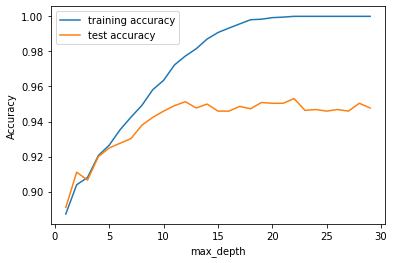

In [135]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)
    tree_test.fit(x_train, y_train)
    training_accuracy.append(tree_test.score(x_train, y_train))
    test_accuracy.append(tree_test.score(x_test, y_test))
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [ ]:
# the above graph shows relationship between Accuracy and max_depth since the decsion tree accuracy is based on the depth of the tree

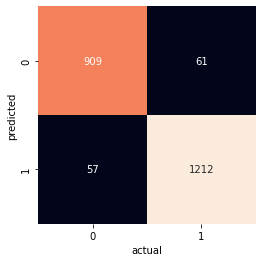

In [136]:
mat = confusion_matrix(y_test, prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('actual')
plt.ylabel('predicted');
